# Importing Libraries

In [8]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Loading Dataset 

**Pima Indian Diabetes Dataset Overview**
* The Pima Indian Diabetes Dataset (PIDD) is a well-known dataset used in machine learning and statistical analysis for diabetes prediction. It was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) and is widely used for binary classification tasks, particularly in medical and healthcare-related machine learning applications.

In [9]:
diabetes = pd.read_csv("pima indians diabetes dataset.csv")
df = diabetes.copy()
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Exploratory Data Analysis (EDA)

In [10]:
df.info() # structural information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* Some measurements in the dataset have zero values. 
* Glucose, BloodPressure, SkinThickness, Insulin, BMI variables cannot have zero values.
* Therefor, it is important to fill in these zero values.

In [11]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

* "It is understood that the dataset is imbalanced."

In [12]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

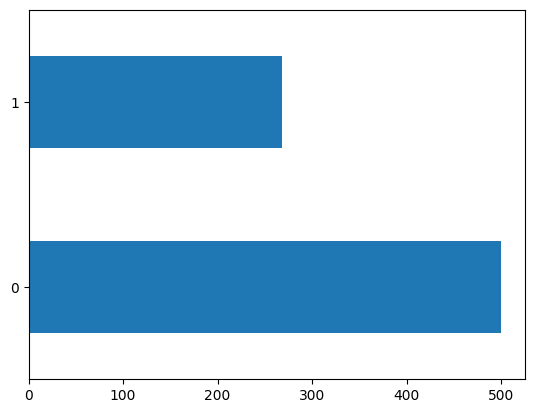

In [13]:
df["Outcome"].value_counts().plot.barh();

In [14]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

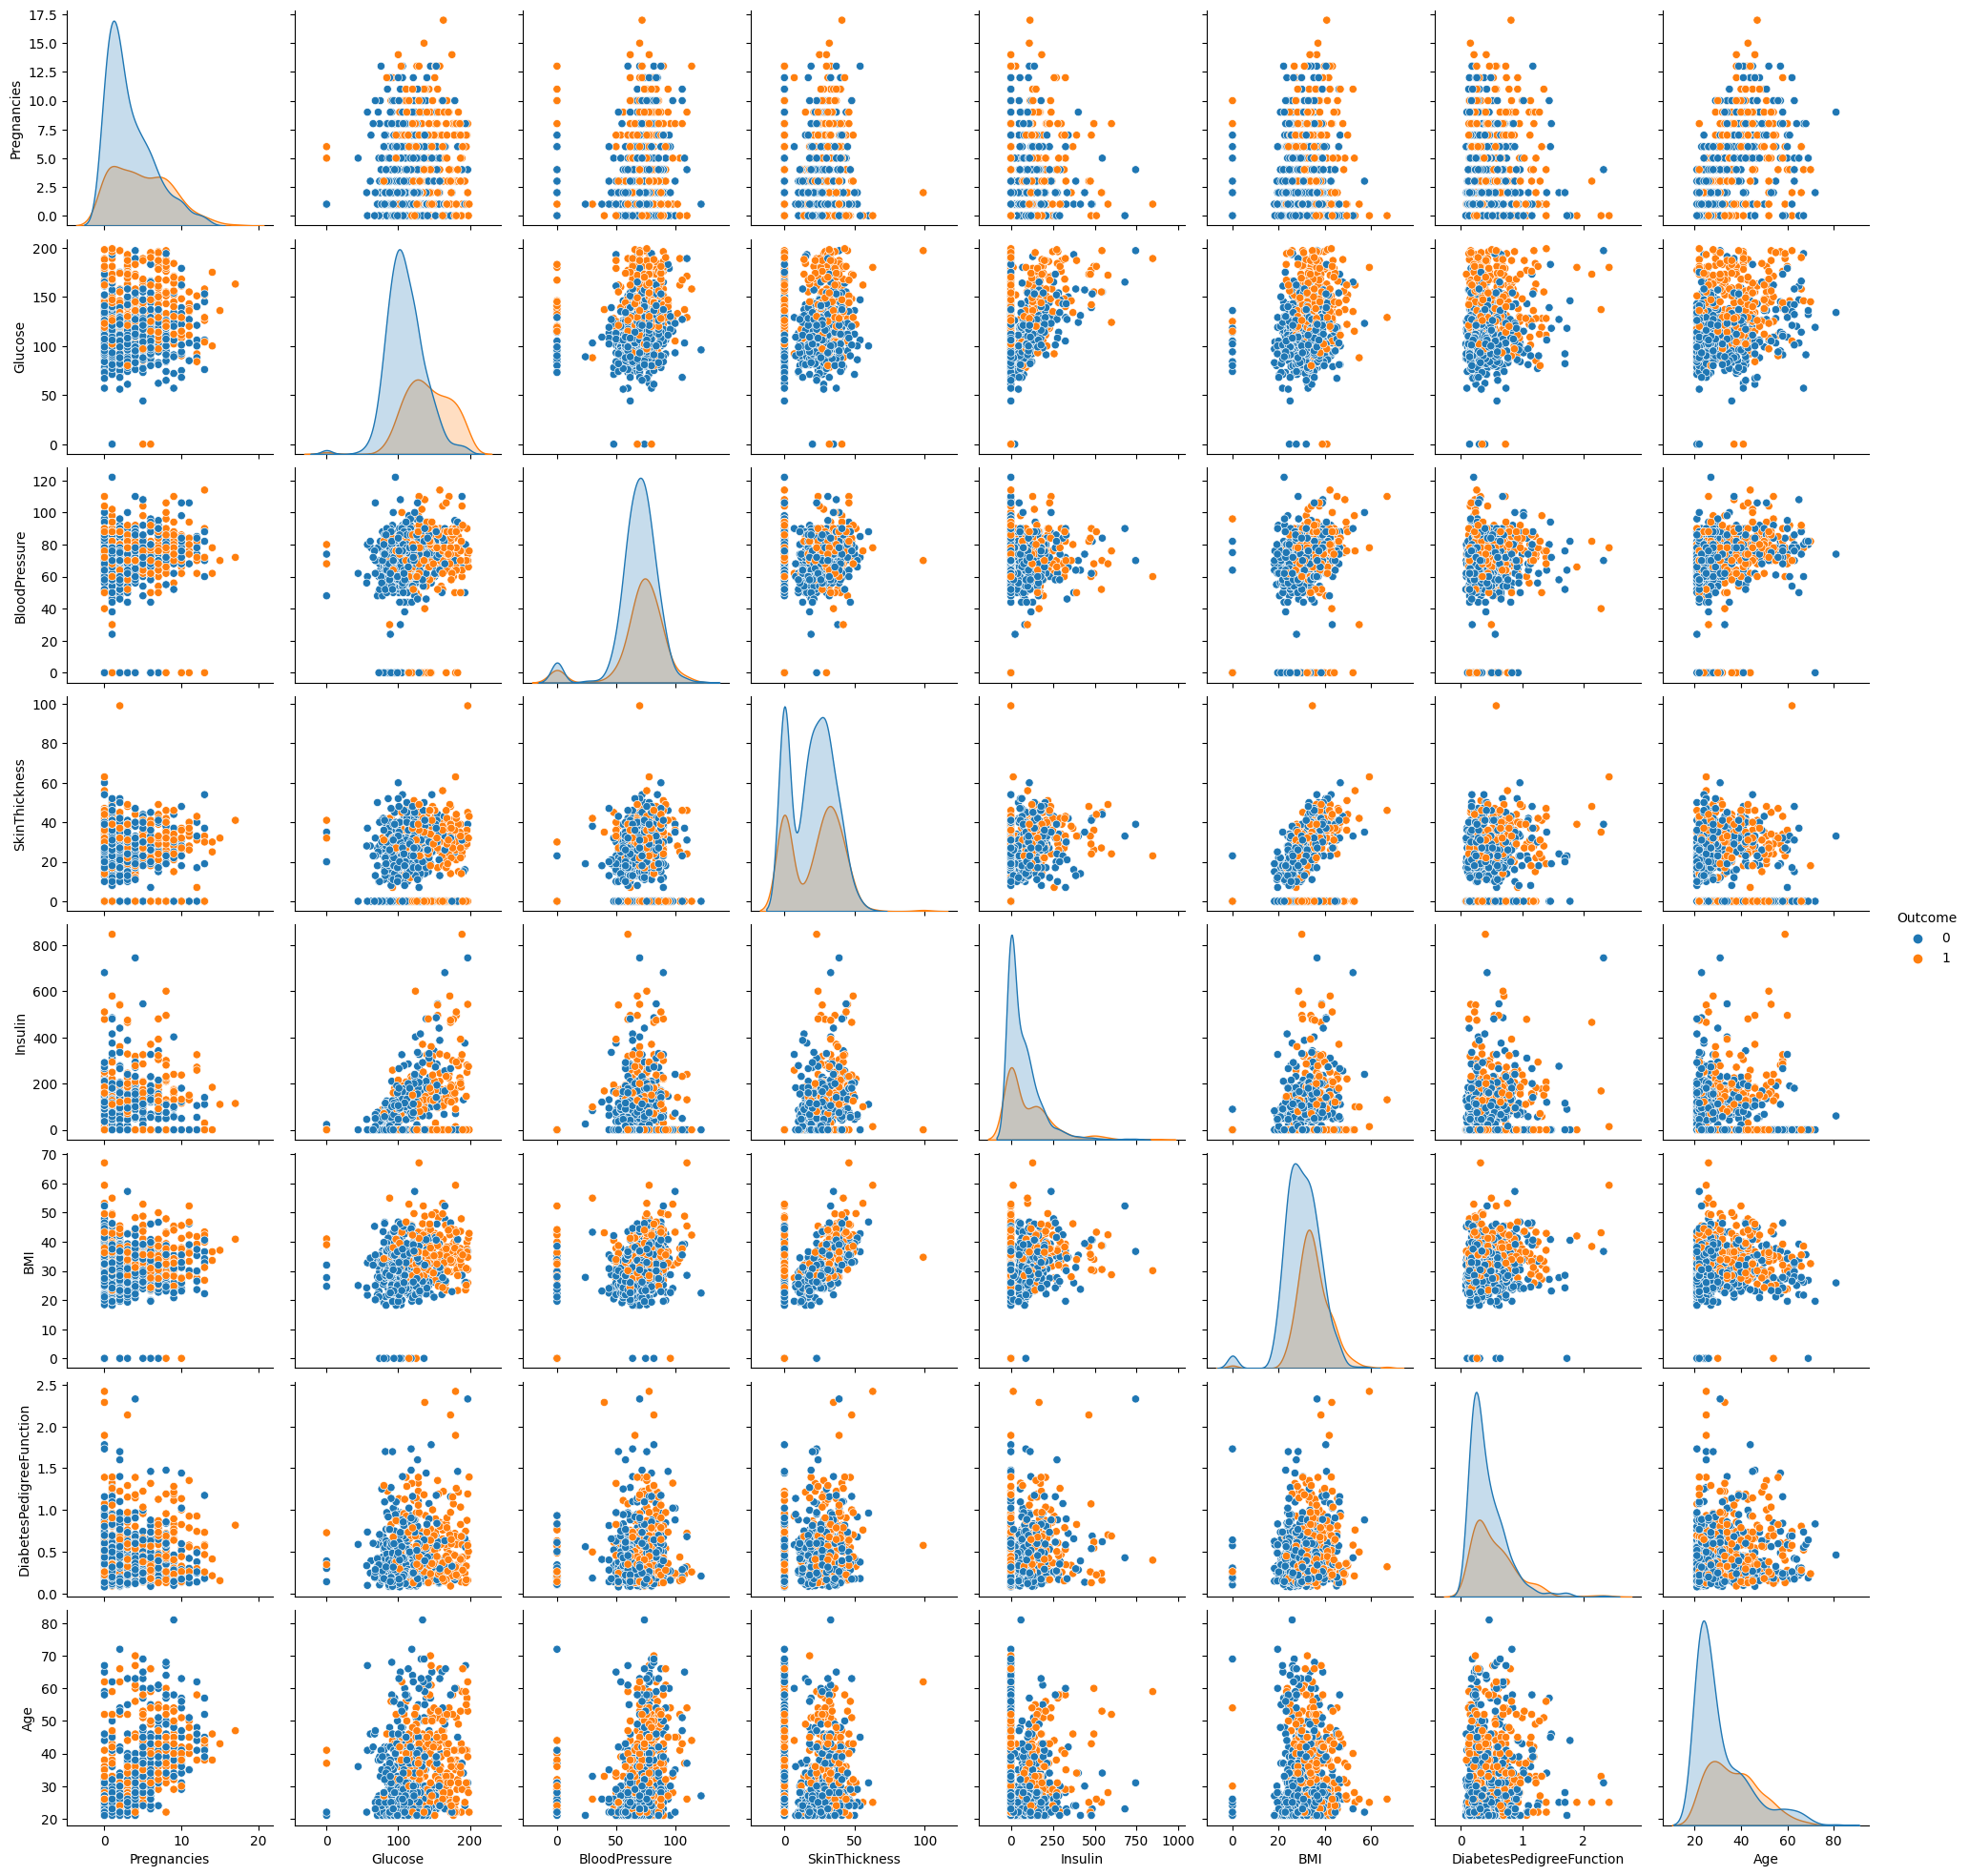

In [15]:
sns.pairplot(df, hue = "Outcome")
plt.show()

In [16]:
def plot_correlation_heatmap(df):
    corr_matrix = df.corr()
    plt.figure(figsize = (10,8))
    sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5) 
    plt.title("Correlation of Features")
    plt.show()

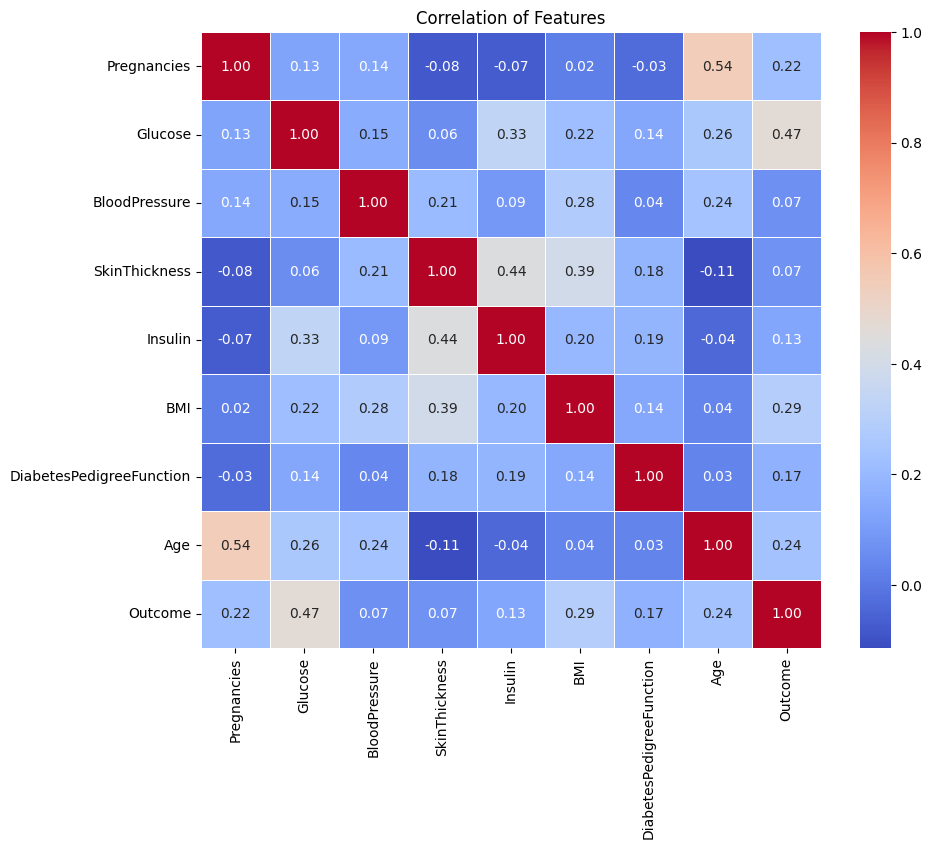

In [17]:
plot_correlation_heatmap(df)

# Preprocessing

## KNN Imputation

In [18]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Columns where 0 values will be considered as missing values.
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 values with NaN.
for col in columns_to_replace:
    df[col] = df[col].replace(0, np.nan)

# To drop rows where any of the specified columns contain 0 value
cleaned_df = df.dropna(subset=columns_to_replace)

# To fill missing values using the K-Nearest Neighbors (KNN) algorithmma
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_filled = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

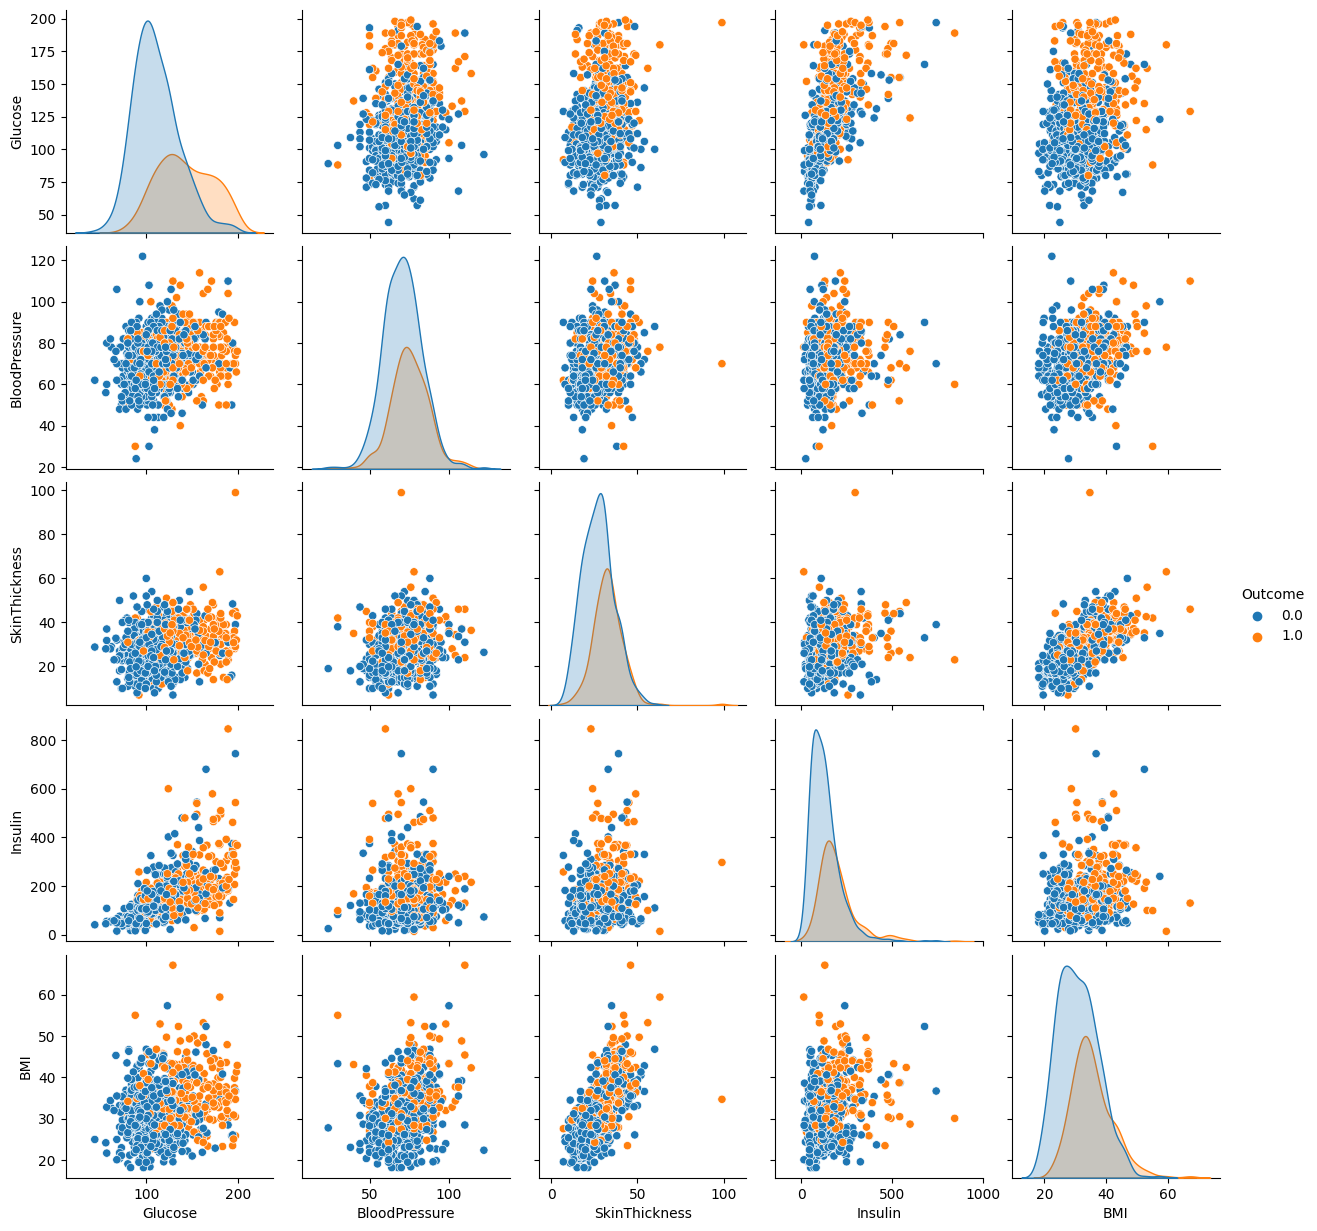

In [22]:
sns.pairplot(df_knn_filled[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']], hue="Outcome")
plt.show()

In [23]:
(df_knn_filled == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [24]:
df_knn_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [25]:
df = df_knn_filled

## Train-Test Split 

In [26]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Machine Learning Algorithms

## Logistic Regression

In [28]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)

cross_val_score(loj_model, X_test, y_test, cv = 10).mean() # doğrulanmış ortalama hata

0.7658333333333334

## Naive Bayes (Gaussian)

In [29]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.7604166666666666

## K-Nearest Neighbor (KNN)

In [30]:
knn_params = {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

print("The Best skor:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The Best skor:0.7574828133262825
The best parameters: {'n_neighbors': 19}


In [31]:
# Fine-tuned model
knn = KNeighborsClassifier(19)
knn_tuned = knn.fit(X_train, y_train)

knn_tuned.score(X_test, y_test)

0.7142857142857143

## Support Vector Classification (SVC)

In [32]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

print("The best parameters: " + str(svc_cv_model.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
The best parameters: {'C': 4}


In [33]:
# Fine-tuned model
svc_tuned = SVC(kernel = "linear", C = 4).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7727272727272727

## SVC - Radial Basis Function (RBF)

In [34]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

print("The best parameters: " + str(svc_cv_model.best_params_))

Fitting 10 folds for each of 64 candidates, totalling 640 fits
The best parameters: {'C': 5, 'gamma': 0.0001}


In [35]:
# Fine-tuned modell
svc_tuned = SVC(C = 5, gamma = 0.0001).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7467532467532467

## Artificial Neural Network (ANN)

In [40]:
# Standardization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ANN Model
from sklearn.neural_network import MLPClassifier

# parameters to be tuned
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

# Model tuning
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

print("The best parameters: " + str(mlpc_cv_model.best_params_))

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
The best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}


In [57]:
# Fine-tuned model
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.001, 
                           hidden_layer_sizes = (10, 10, 10),
                          solver = "adam")

mlpc_tuned.fit(X_train_scaled, y_train)

y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7597402597402597

## Classification and Regression Trees (CART)

In [42]:
from sklearn.tree import DecisionTreeClassifier

# parameters to be tuned
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

# Model tuning 
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

print("The best parameters: " + str(cart_cv_model.best_params_))

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
The best parameters: {'max_depth': 2, 'min_samples_split': 2}


In [43]:
# Fine-tuned model
cart = tree.DecisionTreeClassifier(max_depth = 2, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7727272727272727

## Random Forests (RF)

In [44]:
from sklearn.ensemble import RandomForestClassifier

# parameters to be tuned
rf_params = {"max_depth":[2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

# Model tuning 
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

print("The best parameters: " + str(rf_cv_model.best_params_))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
The best parameters: {'max_depth': 2, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 1000}


In [58]:
# Fine-tuned model
rf_tuned = RandomForestClassifier(max_depth = 2,
                                  max_features = 2,
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7727272727272727

Text(0.5, 0, 'importance of variables')

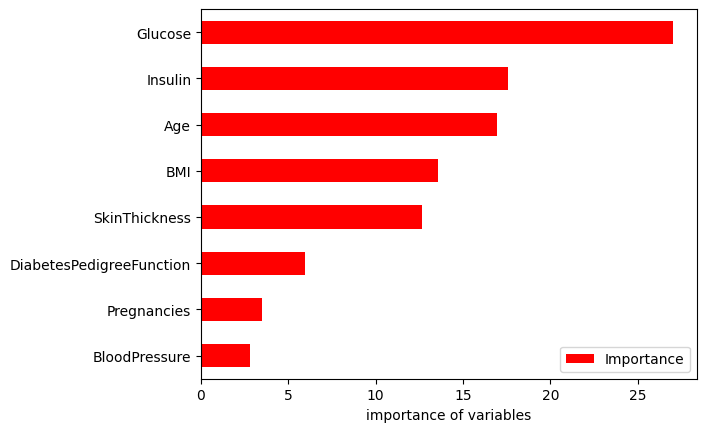

In [46]:
# To determine the importance of variables (feature importance)
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("importance of variables")

## Gradient Boosting Machine (GBM)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# parameters to be tuned
gbm_params = {"learning_rate": [0.001, 0.01, 0.1, 0.05],
              "n_estimators": [10,500,1000],
              "max_depth":[2,5,8,10],
              "min_samples_split": [2,5,10]}

# Model tuning
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)

print("The best parameters: " + str(gbm_cv.best_params_))

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
The best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [48]:
# Fine-tuned model
gbm = GradientBoostingClassifier(learning_rate = 0.01,
                                 max_depth = 2,
                                 min_samples_split = 2,
                                 n_estimators = 500)

gbm_tuned = gbm.fit(X_train, y_train)

y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

## XGBoost

In [49]:
# !pip install xgboost
from xgboost import XGBClassifier

# parameters to be tuned
xgb_params = {"learning_rate": [0.1, 0.01, 0.02, 0.05],
              "n_estimators": [100, 500, 1000, 2000],
              "max_depth": [3, 4, 5, 6],
              "min_samples_split": [2, 5, 10],
              "subsample": [0.6, 0.8, 1.0]}

# Model tuning
xgb = XGBClassifier()
xgb_cv = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv.fit(X_train, y_train)

print("The best parameters: " + str(xgb_cv.best_params_))

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
The best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.6}


In [50]:
# Fine-tuned model
xgb = XGBClassifier(learning_rate = 0.01,
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 500,
                    subsample = 0.6)

xgb_tuned = xgb.fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7337662337662337

## LightGBM

In [51]:
# !conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

# parameters to be tuned
lgbm_params = {"learning_rate": [0.1, 0.01, 0.02, 0.05],
              "n_estimators": [100, 500, 1000, 2000],
              "max_depth": [3, 4, 5, 6],
              "min_child_samples": [5, 10, 20],
              "subsample": [0.6, 0.8, 1.0]}

# Model tuning
lgbm = LGBMClassifier()
lgbm_cv = GridSearchCV(lgbm, lgbm_params, cv = 10, n_jobs = -1, verbose = 2)
lgbm_cv.fit(X_train, y_train)

print("The best parameters: " + str(lgbm_cv.best_params_))

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [52]:
# Fine-tuned model
lgbm = LGBMClassifier(learning_rate = 0.02,
                    max_depth = 3,
                    min_child_samples = 10,
                    n_estimators = 100,
                    subsample = 0.6)

lgbm_tuned = lgbm.fit(X_train, y_train)

y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

0.7662337662337663

## CatBoost

In [53]:
# !pip install catboost
from catboost import CatBoostClassifier

catb_params = { "iterations":[200,500],
                "learning_rate":[0.01, 0.05, 0.1],
                "depth" : [3, 5, 8]}

catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)

catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6379217	total: 136ms	remaining: 27.1s
1:	learn: 0.6007783	total: 139ms	remaining: 13.7s
2:	learn: 0.5672505	total: 141ms	remaining: 9.26s
3:	learn: 0.5506978	total: 143ms	remaining: 7.01s
4:	learn: 0.5265226	total: 145ms	remaining: 5.66s
5:	learn: 0.5109918	total: 147ms	remaining: 4.76s
6:	learn: 0.4944081	total: 150ms	remaining: 4.12s
7:	learn: 0.4818861	total: 152ms	remaining: 3.65s
8:	learn: 0.4643249	total: 154ms	remaining: 3.28s
9:	learn: 0.4539428	total: 157ms	remaining: 2.98s
10:	learn: 0.4447845	total: 159ms	remaining: 2.73s
11:	learn: 0.4346493	total: 161ms	remaining: 2.52s
12:	learn: 0.4247338	total: 163ms	remaining: 2.35s
13:	learn: 0.4176127	total: 165ms	remaining: 2.2s
14:	learn: 0.4102875	total: 168ms	remaining: 2.07s
15:	learn: 0.4066013	total: 170ms	remaining: 1.95s
16:	learn: 0.4024049	total: 172ms	remaining: 1.85s
17:	learn: 0.3982739	total: 174ms	remaining: 1.76s
18:	learn: 0.3938370	total: 176m

{'depth': 5, 'iterations': 200, 'learning_rate': 0.1}

In [54]:
# Fine-tuned model
catb_tuned = CatBoostClassifier(iterations = 200, 
                               learning_rate = 0.1, 
                               depth = 5)

catb_tuned = catb_tuned.fit(X_train,y_train)

y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0:	learn: 0.6379217	total: 2.45ms	remaining: 488ms
1:	learn: 0.6007783	total: 4.77ms	remaining: 472ms
2:	learn: 0.5672505	total: 7.3ms	remaining: 480ms
3:	learn: 0.5506978	total: 9.67ms	remaining: 474ms
4:	learn: 0.5265226	total: 11.9ms	remaining: 465ms
5:	learn: 0.5109918	total: 14.2ms	remaining: 461ms
6:	learn: 0.4944081	total: 16.4ms	remaining: 451ms
7:	learn: 0.4818861	total: 18.7ms	remaining: 449ms
8:	learn: 0.4643249	total: 20.9ms	remaining: 443ms
9:	learn: 0.4539428	total: 23.1ms	remaining: 439ms
10:	learn: 0.4447845	total: 25.4ms	remaining: 437ms
11:	learn: 0.4346493	total: 27.5ms	remaining: 430ms
12:	learn: 0.4247338	total: 29.7ms	remaining: 427ms
13:	learn: 0.4176127	total: 32ms	remaining: 425ms
14:	learn: 0.4102875	total: 34.3ms	remaining: 423ms
15:	learn: 0.4066013	total: 36.4ms	remaining: 419ms
16:	learn: 0.4024049	total: 38.5ms	remaining: 414ms
17:	learn: 0.3982739	total: 40.6ms	remaining: 411ms
18:	learn: 0.3938370	total: 42.8ms	remaining: 407ms
19:	learn: 0.3914625	tota

0.7402597402597403

# Comparing The Performans of Machine Learning Models

In [60]:
modeller = [knn_tuned,
            loj_model,
            svc_tuned,
            nb_model,
            mlpc_tuned,
            cart_tuned,
            rf_tuned,
            gbm_tuned,
            catb_tuned,
            lgbm_tuned,
            xgb_tuned]

for model in modeller:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ".")
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier.
Accuracy: 71.4286%
----------------------------
LogisticRegression.
Accuracy: 75.9740%
----------------------------
SVC.
Accuracy: 74.6753%
----------------------------
GaussianNB.
Accuracy: 74.0260%
----------------------------
MLPClassifier.
Accuracy: 35.7143%
----------------------------
DecisionTreeClassifier.
Accuracy: 77.2727%
----------------------------
RandomForestClassifier.
Accuracy: 77.2727%
----------------------------
GradientBoostingClassifier.
Accuracy: 76.6234%
----------------------------
CatBoostClassifier.
Accuracy: 74.0260%
----------------------------
LGBMClassifier.
Accuracy: 76.6234%
----------------------------
XGBClassifier.
Accuracy: 73.3766%


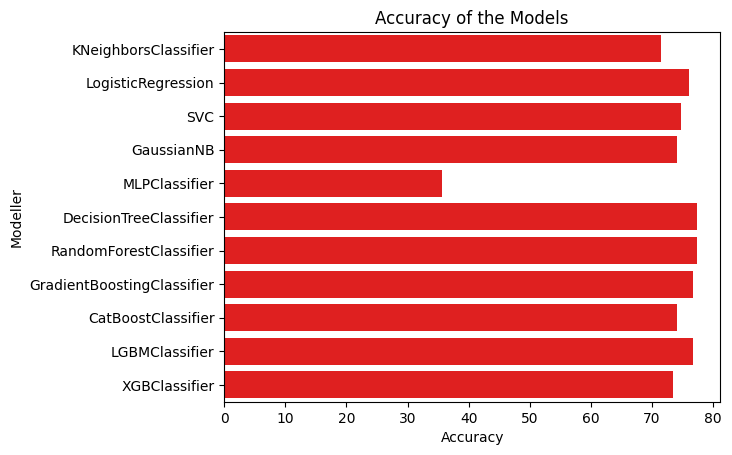

In [61]:
sonuc = []
sonuclar = pd.DataFrame(columns = ["Modeller", "Accuracy"])
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns = ["Modeller", "Accuracy"])
    sonuclar = sonuclar.append(sonuc)

sns.barplot(x = "Accuracy", y = "Models", data = sonuclar, color = "r")
plt.xlabel("Accuracy")
plt.title("Accuracy of the Models");